<a href="https://colab.research.google.com/github/shatha-me/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Status Prediction

## Problem Statement
Financial institutions receive thousands of loan applications every year.
Approving loans without proper risk assessment can lead to financial losses,
while rejecting eligible applicants affects customer trust.

## Goal
The goal of this project is to build a machine learning model that predicts
whether a loan application will be approved or rejected based on applicant
financial and demographic information.

## Objective
- Analyze loan applicant data
- Identify key factors influencing loan approval
- Build and evaluate multiple machine learning models
- Select the best performing model based on appropriate metrics


### Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis (EDA)

In this section, we explore the structure of the dataset, analyze distributions,
identify missing values, and understand relationships between features and the target variable.


In [3]:
loan_dataset = pd.read_csv("/content/sample_data/loans_dataset.csv")
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [5]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missign data in each columm
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [8]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
# Dependents coluomns values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [10]:
# replace 3+ with 4
loan_dataset['Dependents'].replace('3+')


/tmp/ipython-input-238571804.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  loan_dataset['Dependents'].replace('3+')


,Dependents
0,0
1,1
2,0
3,0
4,0
...,...
609,0
610,0
611,1
612,2


In [11]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [12]:
# other way!
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51


### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

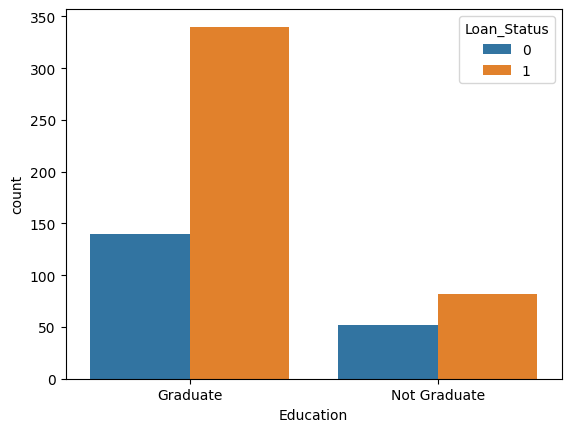

In [13]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

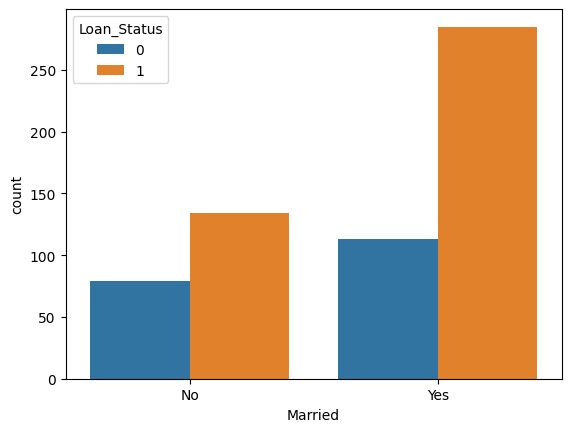

In [14]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Loan_Status', ylabel='count'>

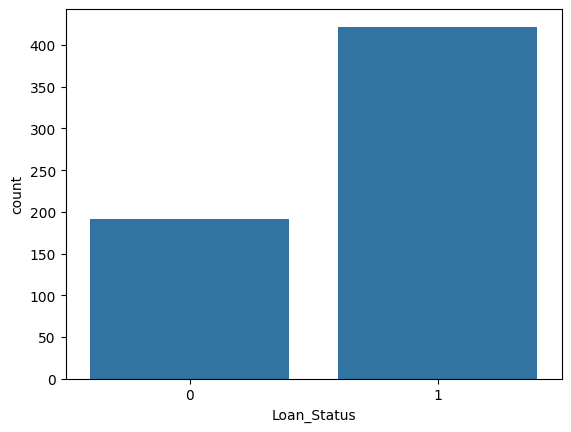

In [15]:
# Target Variable Distribution
sns.countplot(x='Loan_Status',data=loan_dataset)

- The target variable shows a slight imbalance between approved and rejected loans.
- This imbalance should be considered during model evaluation.


### Numerical Features Distribution

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>]], dtype=object)

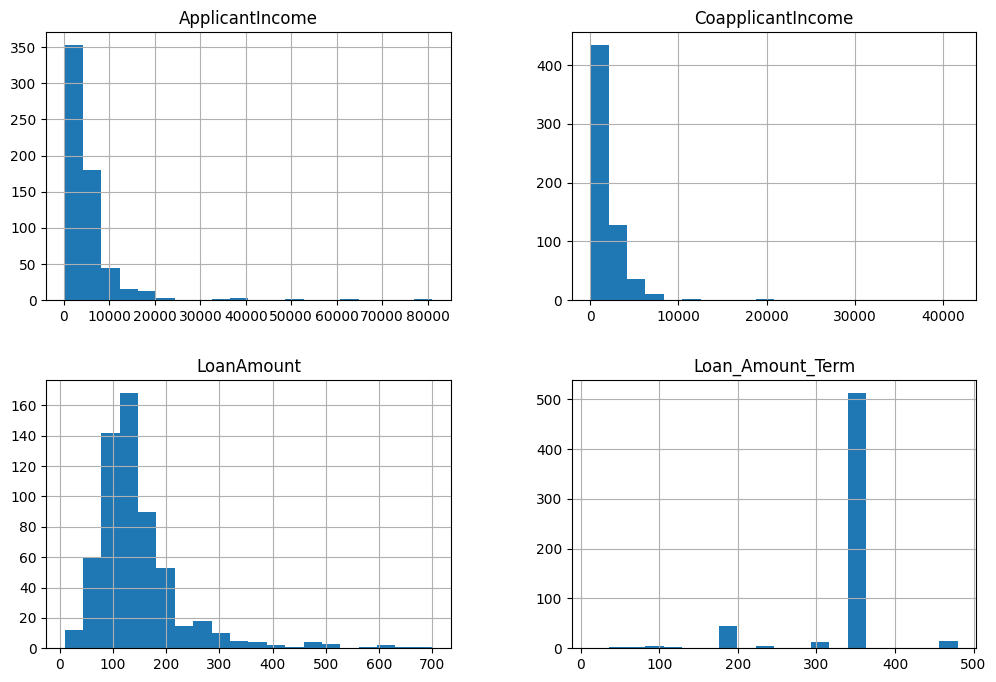

In [16]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome',
                      'LoanAmount', 'Loan_Amount_Term']

loan_dataset[numerical_features].hist(bins=20, figsize=(12,8))


- ApplicantIncome and LoanAmount are right-skewed.
- Some extreme values suggest potential outliers.
- Feature scaling or transformation may improve model performance.


### Categorical Features vs Loan Status

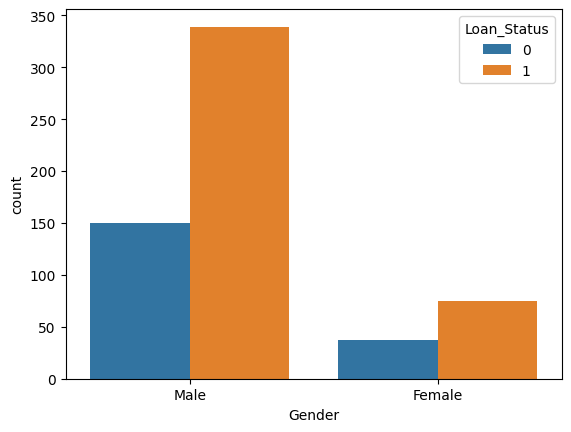

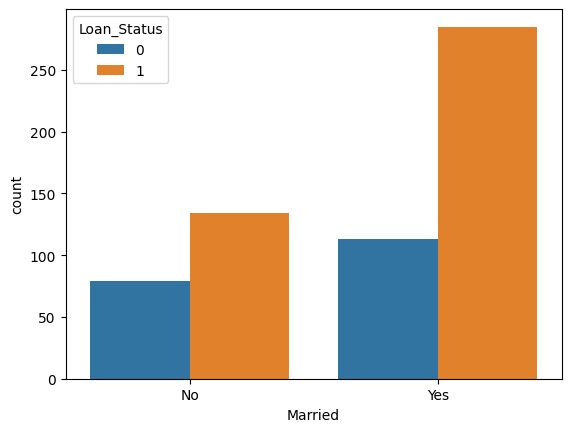

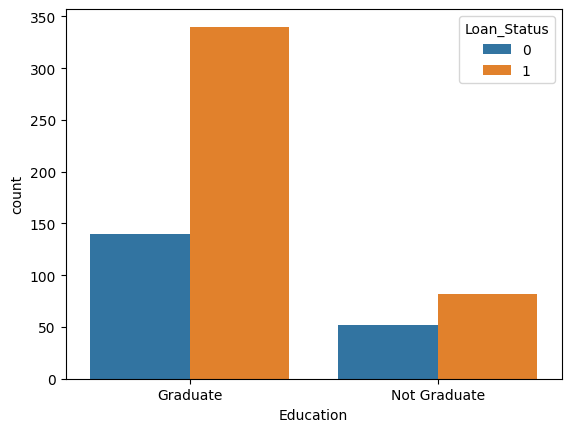

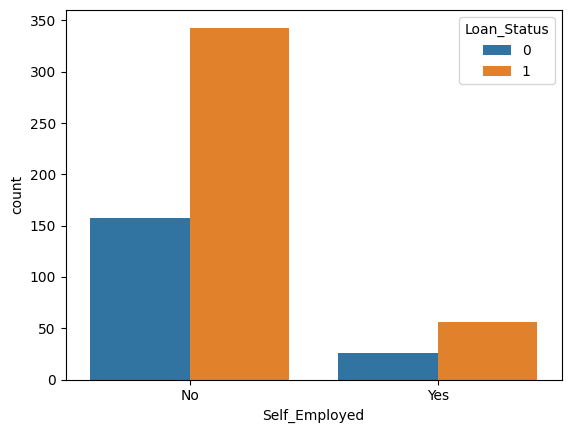

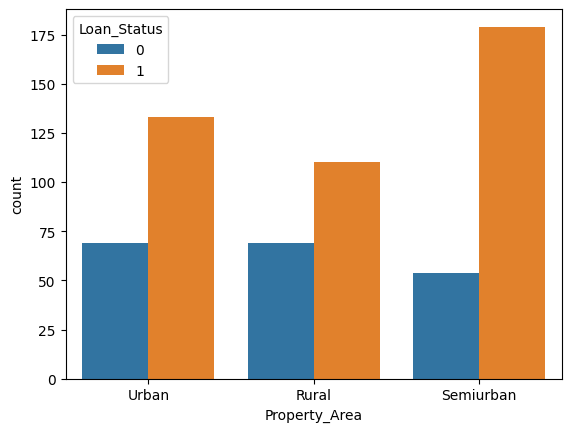

In [17]:

categorical_features = ['Gender', 'Married', 'Education',
                        'Self_Employed', 'Property_Area']

for col in categorical_features:
    sns.countplot(x=col, hue='Loan_Status', data=loan_dataset)
    plt.show()

- Graduate applicants show higher loan approval rates.
- Applicants with credit history are significantly more likely to be approved.
- Property area appears to influence loan approval decisions.


<Axes: xlabel='Credit_History', ylabel='count'>

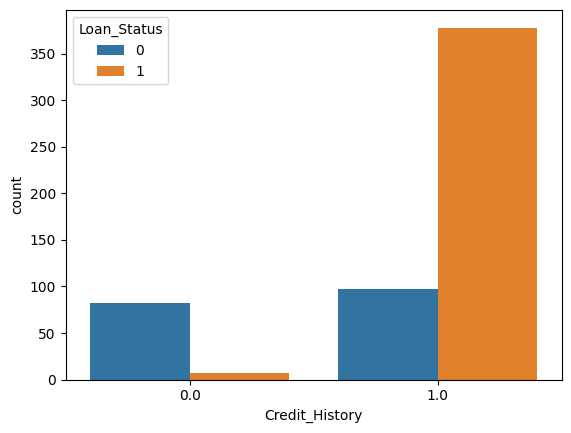

In [18]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_dataset)


- Credit history is the most influential feature.
- Applicants with a valid credit history have a much higher approval probability.


### Correlation Heatmap

In [19]:
# convert categorical columns to numerical values
new_loan_dataset= loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1,'Not Graduate':0}})

/tmp/ipython-input-563728276.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_loan_dataset= loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},


<Axes: >

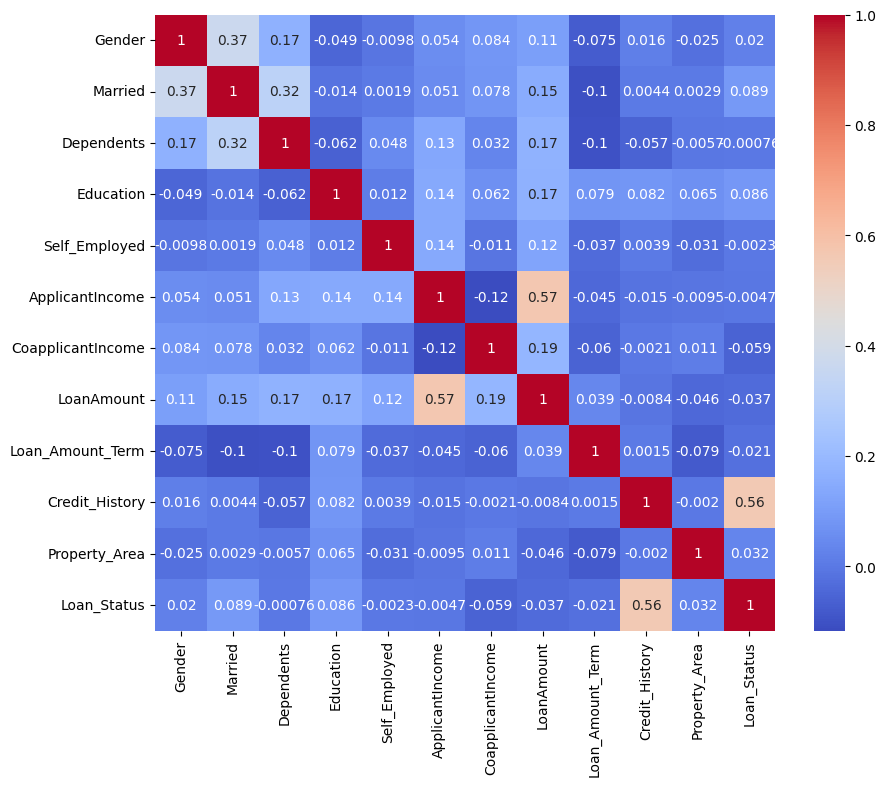

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(new_loan_dataset.drop('Loan_ID', axis=1).corr(), annot=True, cmap='coolwarm')

- Loan_Status is strongly correlated with Credit_History.
- ApplicantIncome and LoanAmount show moderate correlation.


## Data Cleaning & Preprocessing

### Missing Values

In [21]:
# Check missing values
loan_dataset.isnull().sum()

# Fill categorical features with mode
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_features:
    loan_dataset[col].fillna(loan_dataset[col].mode()[0], inplace=True)

# Fill numerical features with median
numerical_features = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_features:
    loan_dataset[col].fillna(loan_dataset[col].median(), inplace=True)

# Confirm no missing values remain
loan_dataset.isnull().sum()


/tmp/ipython-input-286716978.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_dataset[col].fillna(loan_dataset[col].mode()[0], inplace=True)
/tmp/ipython-input-286716978.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


- All missing values have been imputed using median (numerical) and mode (categorical).
- This preserves the dataset size and avoids potential bias from dropping rows.


### One-Hot Encoding || Label Encoding

In [22]:
# Binary categorical columns
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
le = LabelEncoder()
for col in binary_cols:
    loan_dataset[col] = le.fit_transform(loan_dataset[col])

# Multi-class categorical columns
loan_dataset = pd.get_dummies(loan_dataset, columns=['Property_Area'], drop_first=True)

- Binary features encoded using LabelEncoder.
- Multi-class features (Property_Area) converted to dummy variables.
- This ensures all features are numerical and ready for modeling.


### Fix Dependents column

In [23]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].astype(int)

### Feature & Target Separation

In [24]:
# seprating the data and lable
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']


In [25]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           4          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

- Target variable separated from features.
- Loan_ID dropped as it is just an identifier.


## Feature Engineering

### Create New Features (Ratios & Interactions)

In [26]:
# Total income = Applicant + Coapplicant
loan_dataset['Total_Income'] = loan_dataset['ApplicantIncome'] + loan_dataset['CoapplicantIncome']

# Income to Loan Amount ratio
loan_dataset['Income_Loan_Ratio'] = loan_dataset['Total_Income'] / loan_dataset['LoanAmount']

# Log transformation to reduce skewness
loan_dataset['LoanAmount_log'] = np.log(loan_dataset['LoanAmount'])
loan_dataset['Total_Income_log'] = np.log(loan_dataset['Total_Income'])


- Total_Income captures combined financial strength of applicant + coapplicant.
- Income_Loan_Ratio helps assess ability to repay relative to loan requested.
- Log transformations reduce skewness, making distributions closer to normal,
  which improves performance of linear models.


### Handle Outliers (Optional but Recommended)

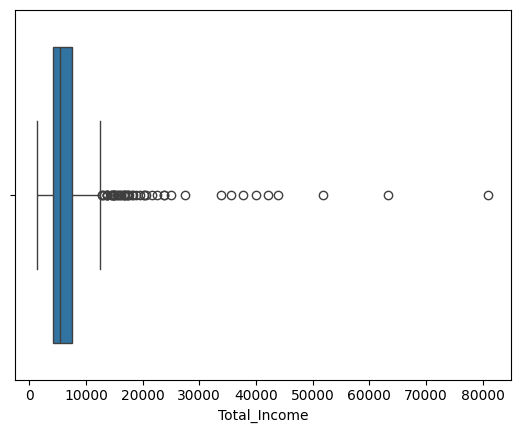

In [27]:
# Boxplot for Total_Income
sns.boxplot(x=loan_dataset['Total_Income'])
plt.show()

# Cap extreme values at 99th percentile
upper_limit = loan_dataset['Total_Income'].quantile(0.99)
loan_dataset['Total_Income'] = np.where(loan_dataset['Total_Income'] > upper_limit,
                                         upper_limit, loan_dataset['Total_Income'])

- Extreme outliers in Total_Income capped at 99th percentile.
- Prevents model bias towards extreme values.


### Final Feature Set

In [28]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])
Y = loan_dataset['Loan_Status']

## Modeling (Multiple Models + Baseline)

### 1️⃣ Train-Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(614, 13) (552, 13) (62, 13)


### 2️⃣ Baseline Model: Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Cross-validation scores
cv_scores = cross_val_score(log_reg, X_train, Y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy:", cv_scores.mean())

# Train on full training set
log_reg.fit(X_train, Y_train)

# Predictions
Y_pred_lr = log_reg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: 0.8133988533988534


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3️⃣ SVM Model

In [32]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)

### 4️⃣ Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

## Evaluation + Hyperparameter Tuning

### 1️⃣ Evaluation Metrics

In [34]:
# Import required libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


### 2️⃣ Evaluation Function

In [35]:
def evaluate_model(Y_test, Y_pred, model_name):
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)

    print(f"--- {model_name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


### 3️⃣ Evaluate all models

--- Logistic Regression ---
Accuracy : 0.8065
Precision: 0.8039
Recall   : 0.9535
F1-score : 0.8723
ROC-AUC  : 0.7136


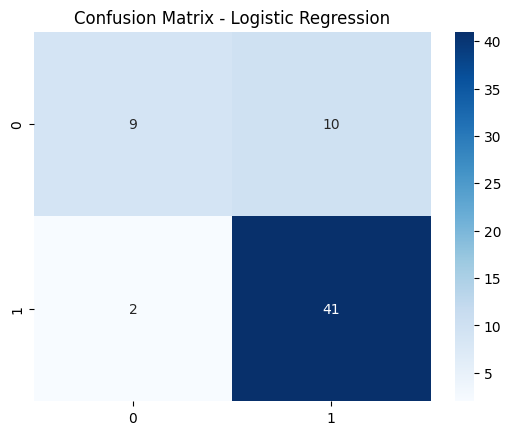

--- SVM ---
Accuracy : 0.8387
Precision: 0.8235
Recall   : 0.9767
F1-score : 0.8936
ROC-AUC  : 0.7515


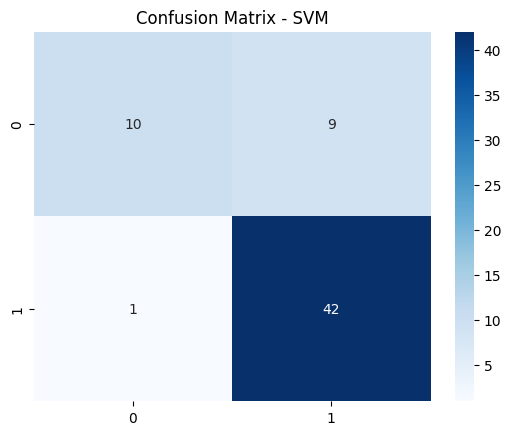

--- Random Forest ---
Accuracy : 0.8387
Precision: 0.8367
Recall   : 0.9535
F1-score : 0.8913
ROC-AUC  : 0.7662


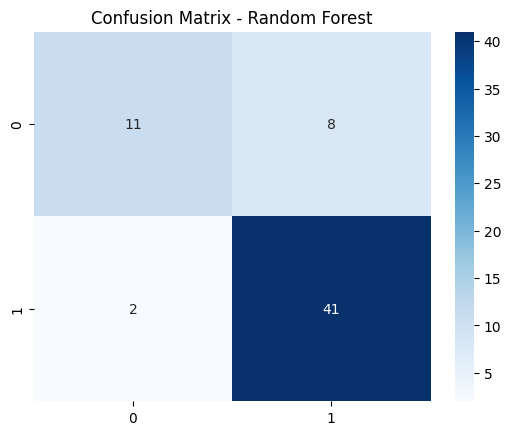

In [36]:
evaluate_model(Y_test, Y_pred_lr, "Logistic Regression")
evaluate_model(Y_test, Y_pred_svm, "SVM")
evaluate_model(Y_test, Y_pred_rf, "Random Forest")

- Compare models based on all metrics, not just accuracy.
- Observe which model handles class imbalance better (Precision/Recall).
- Confusion matrices reveal types of errors (false positives vs false negatives).


**Hyperparameter Tuning (Grid Search)**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
--- Logistic Regression (Tuned) ---
Accuracy : 0.8065
Precision: 0.8039
Recall   : 0.9535
F1-score : 0.8723
ROC-AUC  : 0.7136


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


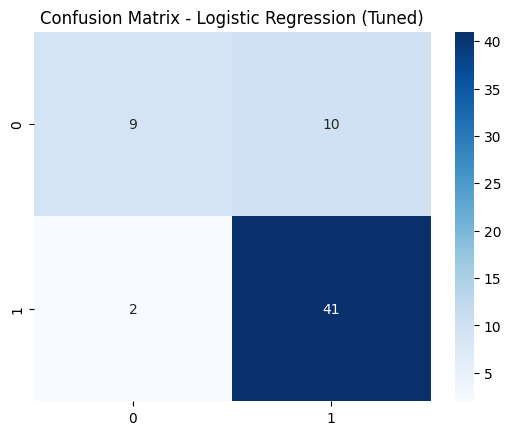

In [37]:
# 1. Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, Y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

# Evaluate tuned model
Y_pred_lr_tuned = grid_lr.predict(X_test)
evaluate_model(Y_test, Y_pred_lr_tuned, "Logistic Regression (Tuned)")


In [38]:
# 2. SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
# grid_svm.fit(X_train, Y_train)
# print("Best parameters for SVM:", grid_svm.best_params_)

# # Evaluate tuned model
# Y_pred_svm_tuned = grid_svm.predict(X_test)
# evaluate_model(Y_test, Y_pred_svm_tuned, "SVM (Tuned)")


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
--- Random Forest (Tuned) ---
Accuracy : 0.8226
Precision: 0.8200
Recall   : 0.9535
F1-score : 0.8817
ROC-AUC  : 0.7399


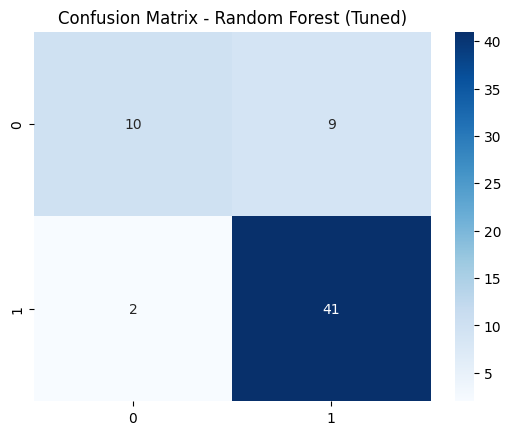

In [39]:
# 3. Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=2), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, Y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Evaluate tuned model
Y_pred_rf_tuned = grid_rf.predict(X_test)
evaluate_model(Y_test, Y_pred_rf_tuned, "Random Forest (Tuned)")


## Final Model & Inference

### Choose Tuned Random Forest

In [40]:
best_model = grid_rf  # Tuned Random Forest

### Prediction on testing data

--- Final Model - Random Forest (Tuned) ---
Accuracy : 0.8226
Precision: 0.8200
Recall   : 0.9535
F1-score : 0.8817
ROC-AUC  : 0.7399


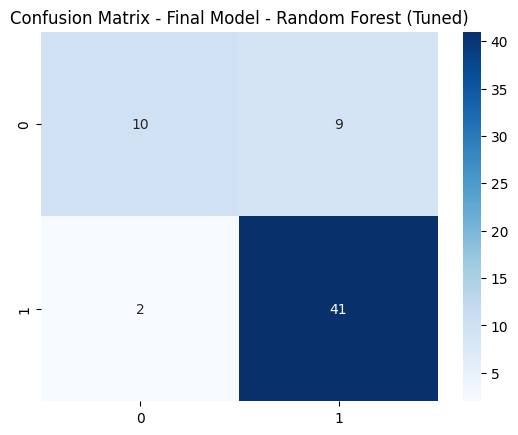

In [41]:
Y_test_pred = best_model.predict(X_test)

# Evaluate final model one last time
evaluate_model(Y_test, Y_test_pred, "Final Model - Random Forest (Tuned)")

### Prediction on new data

In [51]:
# ===== 1️⃣ Define sample applicant =====
sample_applicant = {
    'Gender': 1,  # Male
    'Married': 1,
    'Dependents': 2,
    'Education': 1,  # Graduate
    'Self_Employed': 0,
    'Credit_History': 1,
    'Loan_Amount_Term': 360.0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 1,
    'Property_Area_Urban': 0,
    'Total_Income': 5000 + 0,  # Applicant + Coapplicant
    'Income_Loan_Ratio': 5000 / 150,  # Total income / LoanAmount
    'LoanAmount_log': np.log(150),
    'Total_Income_log': np.log(5000)
}

# ===== 2️⃣ Convert to DataFrame =====
sample_df = pd.DataFrame([sample_applicant])

# ===== 3️⃣ Ensure all columns from training set exist =====
# model_columns = list of columns used for training
model_columns = X_train.columns  # Columns from your trained model

# Add any missing columns with default value 0
for col in model_columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# Reorder columns to match training
sample_df = sample_df[model_columns]

# ===== 4️⃣ Prediction =====
prediction = best_model.predict(sample_df)
print("Loan Approved ✅" if prediction[0] == 1 else "Loan Rejected ❌")


Loan Approved ✅


- The final model predicts whether a loan application will be approved or rejected.
- Features like Credit_History, Total_Income, and Income_Loan_Ratio are highly influential.
- The model can be used as a decision support tool for financial institutions.


### Feature Importance

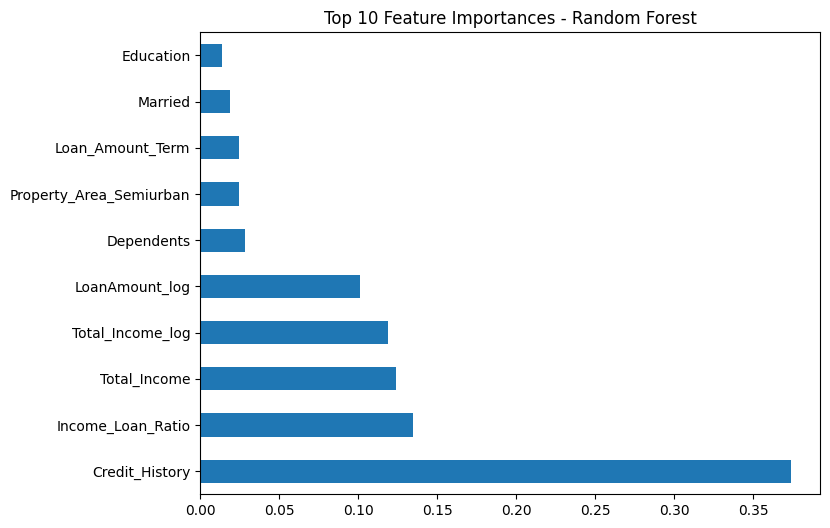

In [45]:
feat_importances = pd.Series(best_model.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()
